C:\Users\acchu\AppData\Roaming\Python\Python312\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.stats import gaussian_kde


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

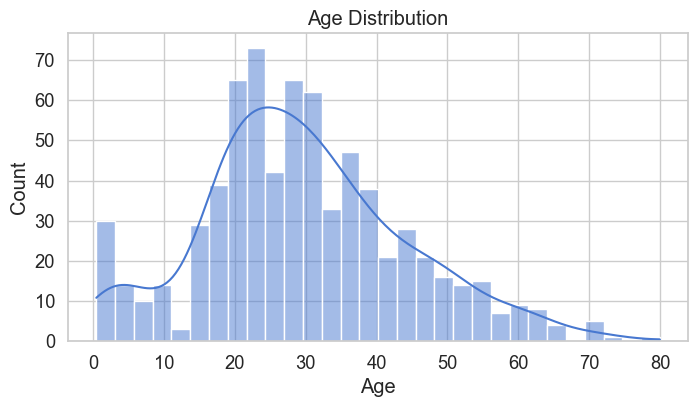

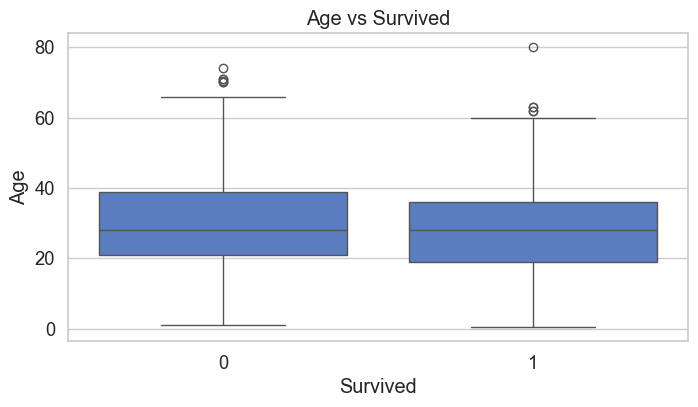

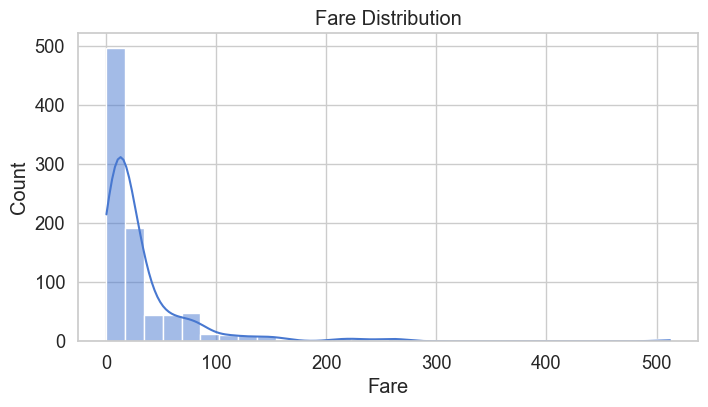

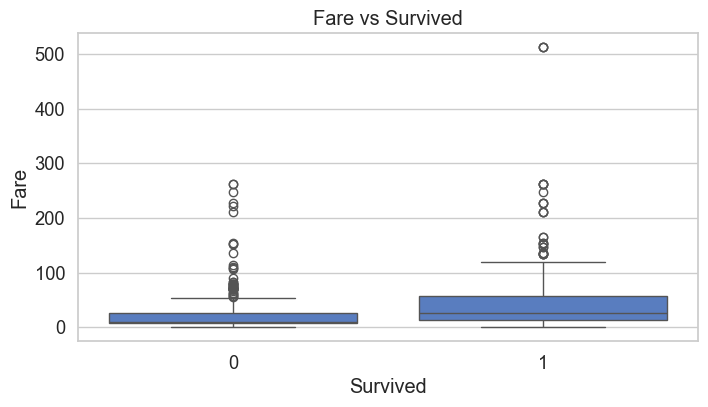

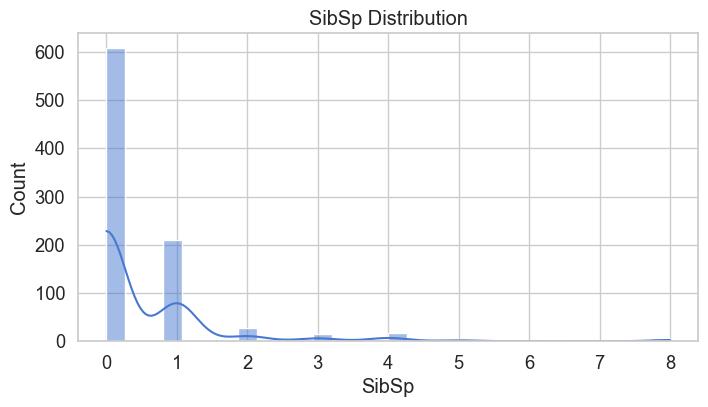

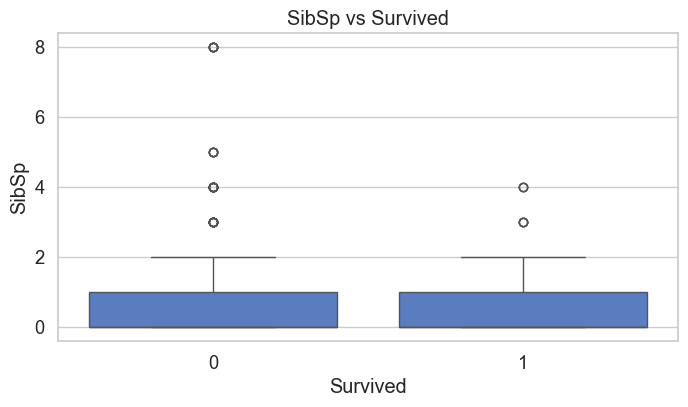

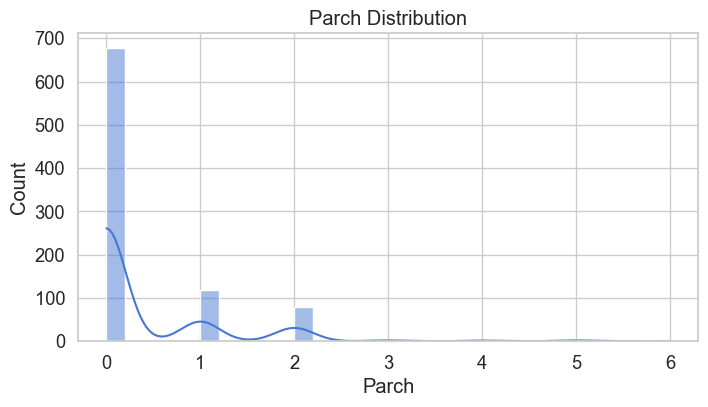

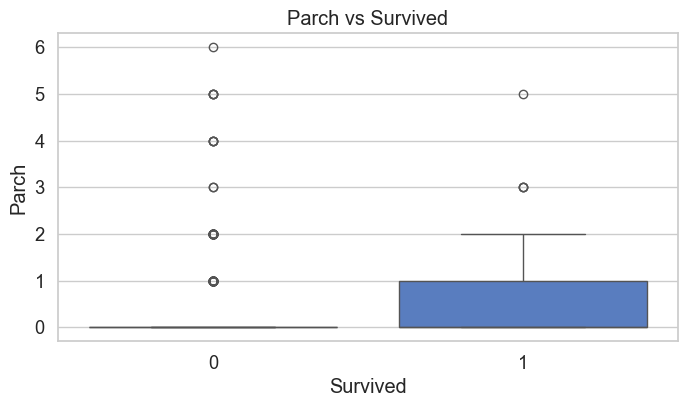

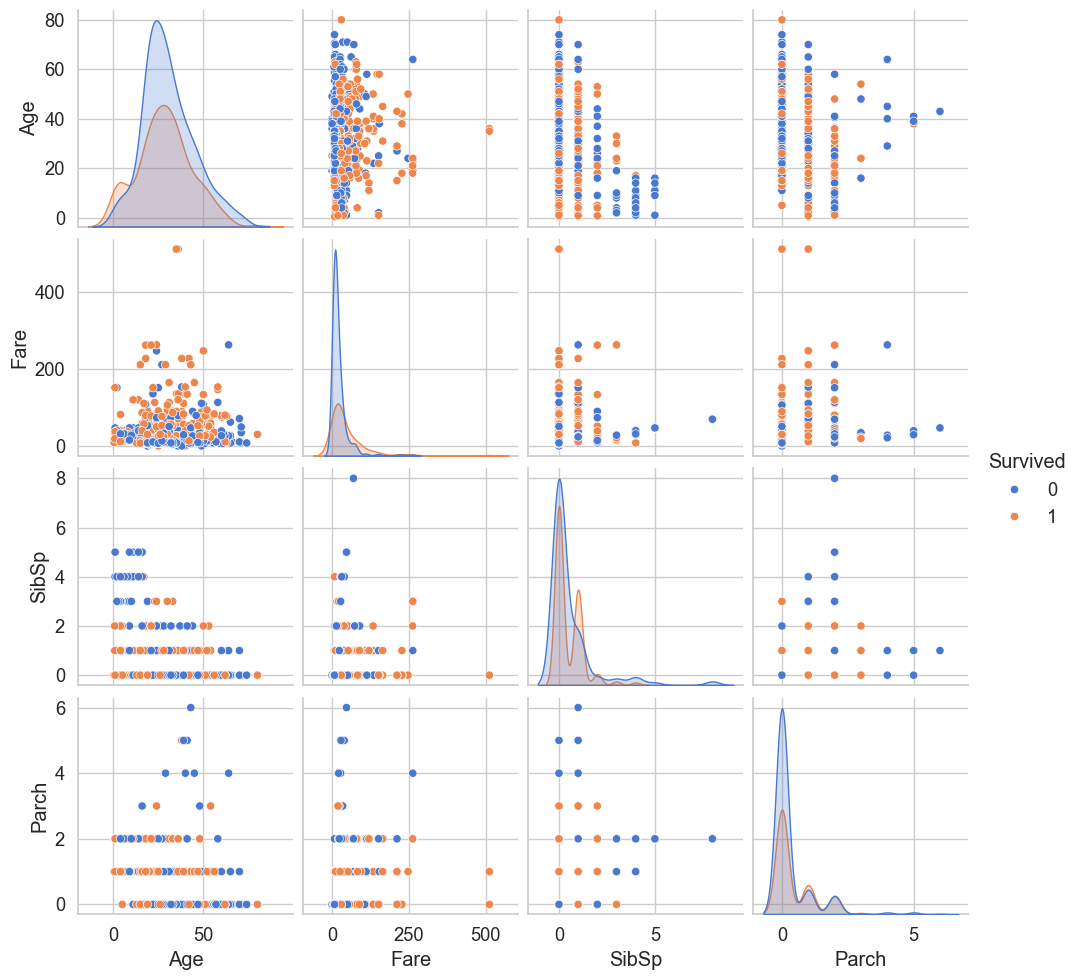

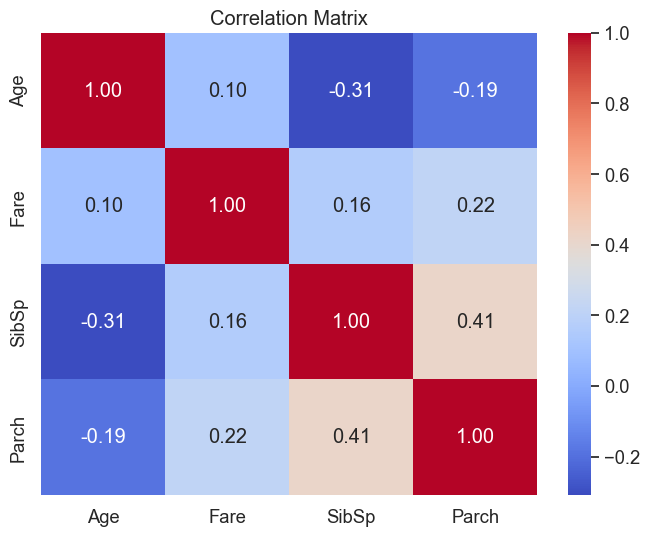

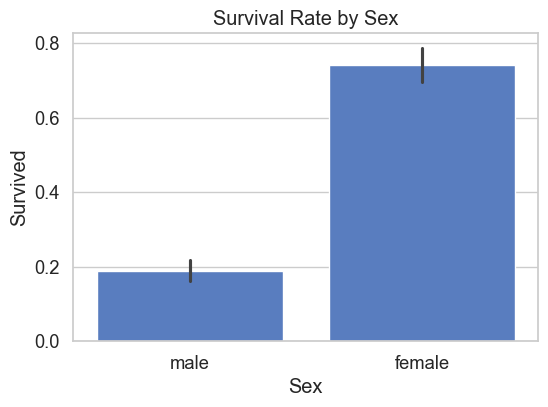

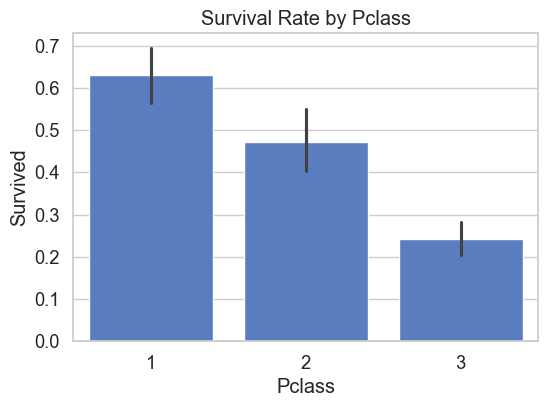

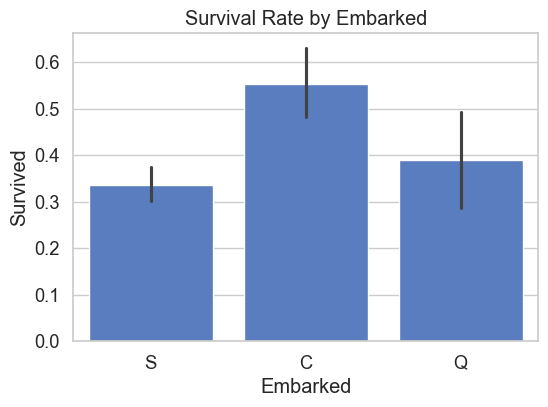


Inferences:

1. Age Distribution: The age distribution is slightly skewed; children and adults show different survival patterns.
2. Gender & Survival: Females had a significantly higher survival rate than males.
3. Class & Survival: First-class passengers had the highest survival rates, indicating access to lifeboats.
4. Fare & Survival: Higher fare passengers are more likely to survive, correlating with class.
5. Embarked: Passengers from certain ports (C, Q, S) show slight variation in survival rates.
6. Outliers: Age and Fare contain outliers visible in boxplots.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

df = pd.read_csv('Titanic-Dataset.csv')
print(df.head())
print(df.describe())
print(df.describe(include='all'))
print(df.isnull().sum())

numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Sex', 'Pclass', 'Embarked']

for feature in numeric_features:
    plt.figure(figsize=(8,4))
    sns.histplot(df[feature].dropna(), kde=True, bins=30)
    plt.title(f'{feature} Distribution')
    plt.show()
    
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Survived', y=feature, data=df)
    plt.title(f'{feature} vs Survived')
    plt.show()

sns.pairplot(df[numeric_features + ['Survived']], hue='Survived', diag_kind='kde')
plt.show()

corr = df[numeric_features].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

for feature in categorical_features:
    plt.figure(figsize=(6,4))
    sns.barplot(x=feature, y='Survived', data=df)
    plt.title(f'Survival Rate by {feature}')
    plt.show()

print("""
Inferences:

1. Age Distribution: The age distribution is slightly skewed; children and adults show different survival patterns.
2. Gender & Survival: Females had a significantly higher survival rate than males.
3. Class & Survival: First-class passengers had the highest survival rates, indicating access to lifeboats.
4. Fare & Survival: Higher fare passengers are more likely to survive, correlating with class.
5. Embarked: Passengers from certain ports (C, Q, S) show slight variation in survival rates.
6. Outliers: Age and Fare contain outliers visible in boxplots.
""")
